In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import nd

features, labels = d2l.get_data_ch7()

def init_adam_states():
    v_w, v_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    s_w, s_b = nd.zeros((features.shape[1], 1)), nd.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * p.grad
        s[:] = beta2 * s + (1 - beta2) * p.grad.square()
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:] -= hyperparams['lr'] * v_bias_corr / (s_bias_corr.sqrt() + eps)
    hyperparams['t'] += 1

loss: 0.243932, 0.233680 sec per epoch


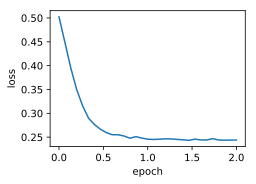

In [2]:
d2l.train_ch7(adam, init_adam_states(), {'lr': 0.01, 't': 1}, features,
              labels)

loss: 0.249078, 0.123412 sec per epoch


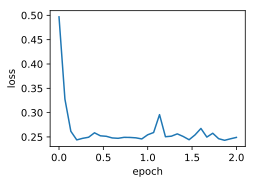

In [14]:
d2l.train_gluon_ch7('adam', {'learning_rate': 0.03}, features, labels)